In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

df = pd.read_csv('Mall_Customers.csv')
print('Форма данных:', df.shape)
print(df.head())
print(df.describe())
print(df.info())

Форма данных: (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000    

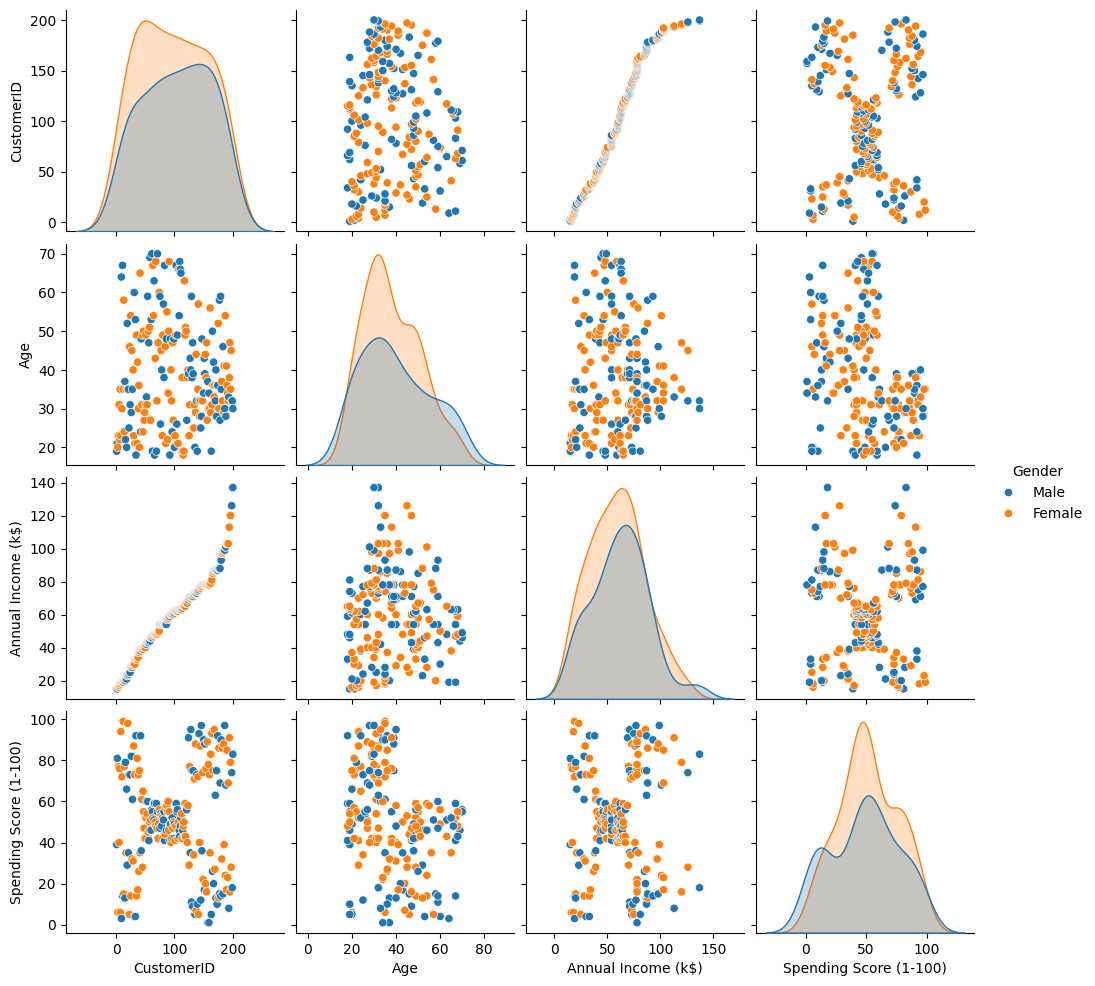

In [2]:
sns.pairplot(df, hue = 'Gender')

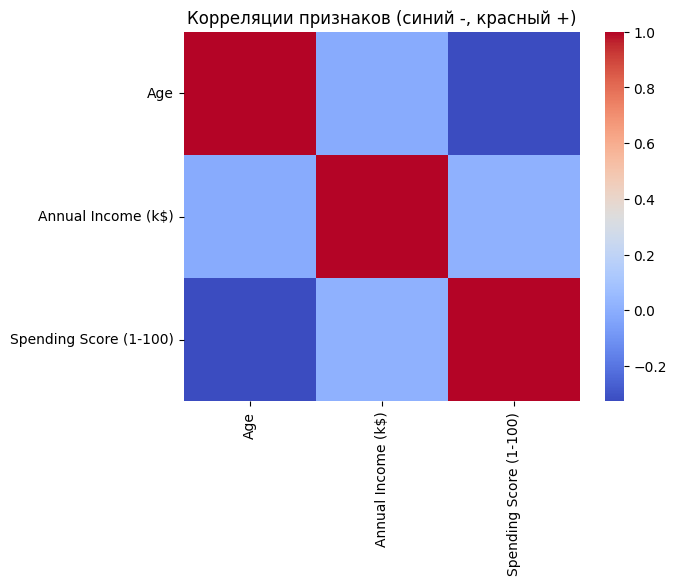

In [6]:
numeric_df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, cmap = 'coolwarm')
plt.title('Корреляции признаков (синий -, красный +)')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

print(X_scaled[:5])

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, random_state = 42)
clusters = kmeans.fit_predict(X_scaled)

print('Первые 10 клиентов:', clusters[:10])

Первые 10 клиентов: [2 2 3 2 2 2 3 2 0 2]


In [14]:
df['Clusters'] = clusters